<a href="https://colab.research.google.com/github/mahsakn/kidney_disease/blob/main/kidney_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mahsa Karimian

**Chronic_Kidney_Disease Data Set**

**import libreries**

In [3]:
from google.colab import drive
data=drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

**read dataset**

In [5]:
data = pd.read_csv('/content/gdrive/MyDrive/kidney_disease/kidney_disease.csv')
data.drop(['id'], axis=1, inplace=True)

In [6]:
data.shape

(400, 25)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

**Data Set Information:**

We use the following representation to collect the dataset   
age - age  
bp - blood pressure   
sg - specific gravity   
al - albumin  
su - sugar  
rbc - red blood cells  
pc - pus cell  
pcc - pus cell clumps  
ba - bacteria  
bgr - blood glucose random  
bu - blood urea  
sc - serum creatinine  
sod - sodium  
pot - potassium  
hemo - hemoglobin  
pcv - packed cell volume  
wc - white blood cell count  
rc - red blood cell count  
htn - hypertension  
dm - diabetes mellitus  
cad - coronary artery disease  
appet - appetite  
pe - pedal edema  
ane - anemia  
class - class  

In [8]:
data.head(10)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60.0,90.0,1.015,3.0,0.0,NaN,NaN,notpresent,notpresent,74.0,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68.0,70.0,1.010,0.0,0.0,NaN,normal,notpresent,notpresent,100.0,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24.0,NaN,1.015,2.0,4.0,normal,abnormal,notpresent,notpresent,410.0,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52.0,100.0,1.015,3.0,0.0,normal,abnormal,present,notpresent,138.0,...,33,9600,4.0,yes,yes,no,good,no,yes,ckd
9,53.0,90.0,1.020,2.0,0.0,abnormal,abnormal,present,notpresent,70.0,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [9]:
data.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

**Attribute Information:**

We use 24 + class = 25 ( 11 numeric ,14 nominal)  
1.Age(numerical)  
age in years  
2.Blood Pressure(numerical)  
bp in mm/Hg  
3.Specific Gravity(nominal)  
sg - (1.005,1.010,1.015,1.020,1.025)  
4.Albumin(nominal)  
al - (0,1,2,3,4,5)  
5.Sugar(nominal)  
su - (0,1,2,3,4,5)  
6.Red Blood Cells(nominal)  
rbc - (normal,abnormal)  
7.Pus Cell (nominal)  
pc - (normal,abnormal)  
8.Pus Cell clumps(nominal)  
pcc - (present,notpresent)  
9.Bacteria(nominal)  
ba - (present,notpresent)  
10.Blood Glucose Random(numerical)  
bgr in mgs/dl  
11.Blood Urea(numerical)  
bu in mgs/dl  
12.Serum Creatinine(numerical)  
sc in mgs/dl  
13.Sodium(numerical)  
sod in mEq/L  
14.Potassium(numerical)  
pot in mEq/L  
15.Hemoglobin(numerical)  
hemo in gms  
16.Packed Cell Volume(numerical)  
17.White Blood Cell Count(numerical)  
wc in cells/cumm  
18.Red Blood Cell Count(numerical)  
rc in millions/cmm  
19.Hypertension(nominal)  
htn - (yes,no)  
20.Diabetes Mellitus(nominal)  
dm - (yes,no)  
21.Coronary Artery Disease(nominal)  
cad - (yes,no)  
22.Appetite(nominal)  
appet - (good,poor)  
23.Pedal Edema(nominal)  
pe - (yes,no)  
24.Anemia(nominal)  
ane - (yes,no)  
25.Class (nominal)   
class - (ckd,notckd)  



In [10]:
NumericalColumns = ['age','bp','bgr','bu','sc','sod','pot','hemo','sg','pcv','wc','rc']
CategoricalColumns = ['al','su','rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             330 non-null    object 
 16  wc              295 non-null    object 
 17  rc              270 non-null    obj

In [12]:
NumericalColumns

['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'sg', 'pcv', 'wc', 'rc']

In [13]:
CategoricalColumns

['al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [14]:
for column in CategoricalColumns:
  print(data[column].unique())


[ 1.  4.  2.  3.  0. nan  5.]
[ 0.  3.  4.  1. nan  2.  5.]
[nan 'normal' 'abnormal']
['normal' 'abnormal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['yes' 'no' nan]
['yes' 'no' ' yes' '\tno' '\tyes' nan]
['no' 'yes' '\tno' nan]
['good' 'poor' nan]
['no' 'yes' nan]
['no' 'yes' nan]


In [15]:
data['classification'].replace("ckd\t","ckd",inplace=True)

data['dm'].replace(["\tno","\tyes"," yes"],["no","yes","yes"],inplace=True)

data['cad'].replace(["\tno"],["no"],inplace=True)

In [16]:
data['rc'].replace("\t?",np.nan, inplace=True)

data['wc'].replace("\t?",np.nan, inplace=True)

data['pcv'].replace(["\t?","\t43"],np.nan, inplace=True)

In [17]:
# fix non-numeric values with nan or valid int or float values
data[NumericalColumns] = data[NumericalColumns].applymap(pd.to_numeric, errors='coerce')
mask = data[NumericalColumns].applymap(np.isreal)
data[~mask.all(axis=1)] # to check if everything is fine

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


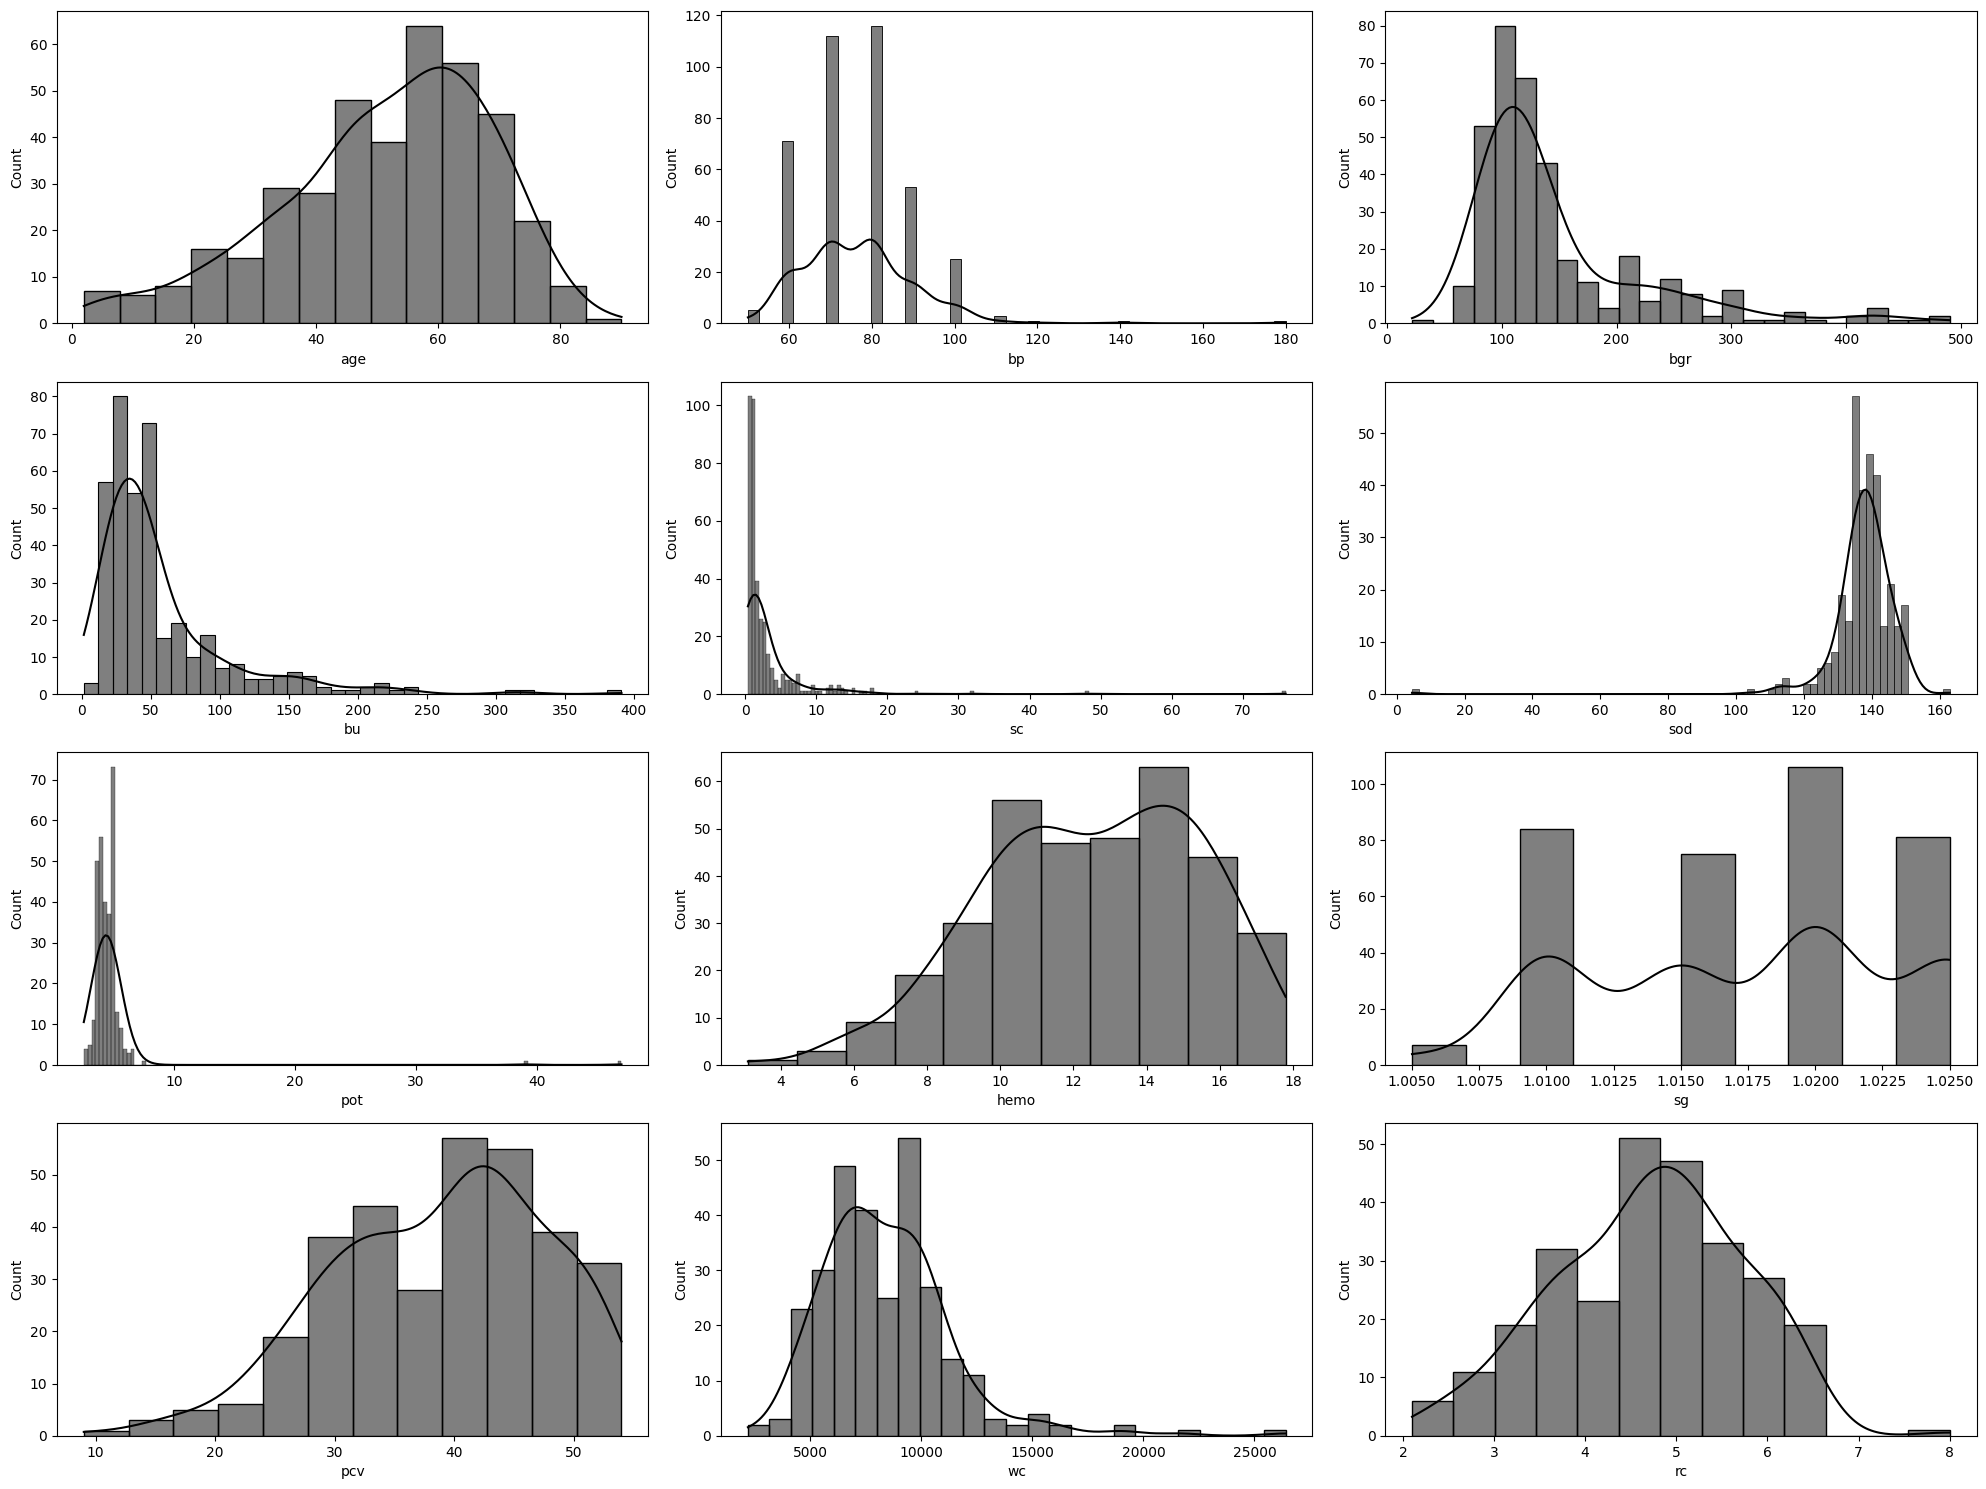

In [18]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in NumericalColumns:
    if plotnumber <= 14:
        ax = plt.subplot(4, 3, plotnumber)
        sns.histplot(data[column],color='black',kde=True)
        plt.xlabel(column)


    plotnumber += 1

plt.tight_layout()
plt.show()

**Imputation of missing values**

In [19]:
class Imputation(BaseEstimator, TransformerMixin):
  def fit(self, data, y=None):
    return self

  def transform(self, data):
    for column_name in CategoricalColumns:
      data[column_name].fillna(data[column_name].mode()[0], inplace=True)
      numeric_mode = ['bp', 'sg', 'bgr', 'sc', 'bu']
      numeric_mean = ['age', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
    for column in numeric_mode:
      data[column].fillna(data[column].mode()[0], inplace=True)

    for column in numeric_mean:
      data[column].fillna(data[column].mean(), inplace=True)
    return data


In [20]:
for col in CategoricalColumns:
    print(data[col].unique())

[ 1.  4.  2.  3.  0. nan  5.]
[ 0.  3.  4.  1. nan  2.  5.]
[nan 'normal' 'abnormal']
['normal' 'abnormal' nan]
['notpresent' 'present' nan]
['notpresent' 'present' nan]
['yes' 'no' nan]
['yes' 'no' nan]
['no' 'yes' nan]
['good' 'poor' nan]
['no' 'yes' nan]
['no' 'yes' nan]


In [21]:
data['classification'] = data['classification'].map({'ckd': 0, 'notckd': 1})

**Feature Engineering**

In [22]:
class FeatureEngineering(BaseEstimator, TransformerMixin):
  def fit(self, data, y=None):
    return self
  def transform(self, data):

    for column in ['htn', 'dm', 'cad', 'pe', 'ane']:
      data[column] = data[column].map({'yes': 1, 'no': 0})

    for column in ['ba', 'pcc']:
      data[column] = data[column].map({'present': 1, 'notpresent': 0})

    for column in ['rbc', 'pc']:
      data[column] = data[column].map({'normal': 1, 'abnormal': 0})

    return data





**One Hot Encoding for 'appet'**

In [23]:
class OneHotEncoding(BaseEstimator, TransformerMixin):
    def fit(self, data, y=None):
        return self

    def transform(self, data):
        data = pd.get_dummies(data, columns=['appet'])

        return data

The purpose of the pipeline is to assemble several steps that can be cross-validated together while setting different parameters.

In [24]:
preprocessing = Pipeline([
    ('FeatureEngineering', FeatureEngineering()),
    ('Imputation', Imputation()),
    ('BinningEncoding', OneHotEncoding()),
])

**Test and Train**

In [25]:
X = data.copy()
Y = data['classification']
X.drop(['classification'],axis=1 , inplace=True)


In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [27]:
x_train = preprocessing.fit_transform(x_train)
x_test = preprocessing.fit_transform(x_test)

In [28]:
x_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,pe,ane,appet_good,appet_poor
209,19.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,93.0,...,38.980695,6900.000000,4.671163,0.0,0.0,0.0,0,0,1,0
317,58.0,70.0,1.020,0.0,0.0,1.0,1.0,0.0,0.0,102.0,...,40.000000,8100.000000,4.900000,0.0,0.0,0.0,0,0,1,0
70,61.0,80.0,1.015,0.0,4.0,1.0,1.0,0.0,0.0,360.0,...,44.000000,8300.000000,5.200000,1.0,1.0,0.0,0,0,1,0
55,35.0,80.0,1.005,3.0,0.0,0.0,1.0,0.0,0.0,93.0,...,28.000000,8439.316239,4.671163,0.0,0.0,0.0,1,0,1,0
195,70.0,90.0,1.020,2.0,1.0,0.0,0.0,0.0,1.0,184.0,...,38.980695,8439.316239,4.671163,1.0,1.0,1.0,0,0,0,1


**Standard Scaler for x_train and x_test**

In [29]:
scaler_train = StandardScaler()
new_data = scaler_train.fit_transform(x_train.values)
new_data_df_tr = pd.DataFrame(new_data, index=x_train.index, columns=x_train.columns)
x_train = new_data_df_tr

scaler_test = StandardScaler()
new_data = scaler_test.fit_transform(x_test.values)
new_data_df_ts = pd.DataFrame(new_data, index=x_test.index, columns=x_test.columns)
x_test = new_data_df_ts

**plots function**

In [30]:
def plot_model(model, history, x_test_data, y_test_data, plot=True):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

**Neural network without hidden layer**

In [31]:
acc_fold = []
loss_fold = []
fold_n=1
kfold = KFold(n_splits=3, shuffle=True, random_state=1)
for train, test in kfold.split(x_train, y_train):
  model = Sequential()
  model.add(keras.Input(shape=(25,)))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
  h = model.fit(x_train.iloc[train],y_train.iloc[train], batch_size=1, epochs=20, validation_data=(x_train.iloc[test], y_train.iloc[test]), shuffle=True)
  scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
  acc_fold.append(scores[1] * 100)
  loss_fold.append(scores[0])
  fold_n = fold_n + 1

print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(acc_fold)} (+- {np.std(acc_fold)})')
print(f'> Loss: {np.mean(loss_fold)}')

Epoch 1/20
213/213 [==============================] - 2s 5ms/step - loss: 0.9213 - accuracy: 0.4507 - val_loss: 0.6763 - val_accuracy: 0.6449
Epoch 2/20
213/213 [==============================] - 1s 2ms/step - loss: 0.5657 - accuracy: 0.7465 - val_loss: 0.4792 - val_accuracy: 0.7944
Epoch 3/20
213/213 [==============================] - 0s 2ms/step - loss: 0.4072 - accuracy: 0.8263 - val_loss: 0.3850 - val_accuracy: 0.8224
Epoch 4/20
213/213 [==============================] - 0s 2ms/step - loss: 0.3285 - accuracy: 0.8685 - val_loss: 0.3334 - val_accuracy: 0.8411
Epoch 5/20
213/213 [==============================] - 0s 2ms/step - loss: 0.2816 - accuracy: 0.8779 - val_loss: 0.2986 - val_accuracy: 0.8692
Epoch 6/20
213/213 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8967 - val_loss: 0.2745 - val_accuracy: 0.8879
Epoch 7/20
213/213 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9014 - val_loss: 0.2556 - val_accuracy: 0.8879
Epoch 

**Overfitting has occurred**

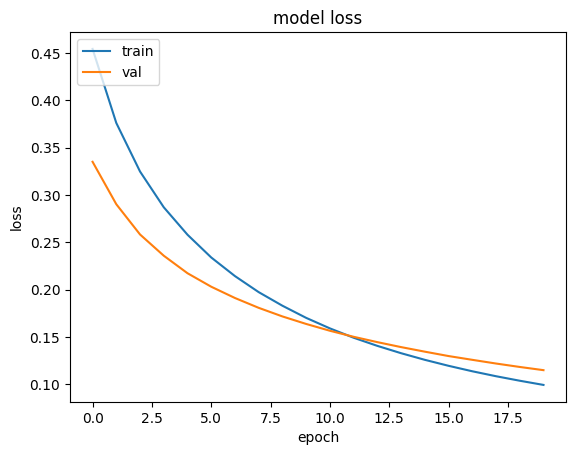

In [32]:
plot_model(model,h,x_test,y_test)

**model function**

In [33]:
def create_model(activation, batch_size=32,unit=32):
    acc_fold = []
    loss_fold = []
    fold_n=1
    kfold = KFold(n_splits=3, shuffle=True, random_state=1)

    for train, test in kfold.split(x_train, y_train):
        model = Sequential()
        model.add(keras.Input(shape=(25,)))
        model.add(Dense(units=unit, activation=activation))
        model.add(Dense(1, activation=activation))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        h = model.fit(x_train.iloc[train],y_train.iloc[train],epochs=15,batch_size=batch_size,validation_data=(x_train.iloc[test], y_train.iloc[test]))
        scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
        acc_fold.append(scores[1] * 100)
        loss_fold.append(scores[0])
        fold_n = fold_n + 1

    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_fold)} (+- {np.std(acc_fold)})')
    print(f'> Loss: {np.mean(loss_fold)}')

    return model,h

**9 different values for the number of neural network neurons**

In [34]:
my_model_8, my_h_8 = create_model(unit=8,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 35ms/step - loss: 2.3933 - accuracy: 0.5211 - val_loss: 1.4651 - val_accuracy: 0.7196
Epoch 2/15
7/7 [==============================] - 0s 9ms/step - loss: 2.0310 - accuracy: 0.6009 - val_loss: 1.2630 - val_accuracy: 0.7290
Epoch 3/15
7/7 [==============================] - 0s 8ms/step - loss: 1.8038 - accuracy: 0.6620 - val_loss: 1.0672 - val_accuracy: 0.7757
Epoch 4/15
7/7 [==============================] - 0s 10ms/step - loss: 1.4538 - accuracy: 0.6854 - val_loss: 1.0198 - val_accuracy: 0.7944
Epoch 5/15
7/7 [==============================] - 0s 8ms/step - loss: 1.1424 - accuracy: 0.7230 - val_loss: 0.8681 - val_accuracy: 0.8037
Epoch 6/15
7/7 [==============================] - 0s 8ms/step - loss: 0.9972 - accuracy: 0.7606 - val_loss: 0.8259 - val_accuracy: 0.8224
Epoch 7/15
7/7 [==============================] - 0s 8ms/step - loss: 0.7902 - accuracy: 0.7746 - val_loss: 0.7964 - val_accuracy: 0.8037
Epoch 8/15
7/7 [================

In [35]:
my_model_16, my_h_16 = create_model(unit=16,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 35ms/step - loss: 4.4566 - accuracy: 0.5775 - val_loss: 3.9795 - val_accuracy: 0.6262
Epoch 2/15
7/7 [==============================] - 0s 10ms/step - loss: 3.6196 - accuracy: 0.6432 - val_loss: 2.9646 - val_accuracy: 0.6449
Epoch 3/15
7/7 [==============================] - 0s 8ms/step - loss: 3.0883 - accuracy: 0.6761 - val_loss: 2.4789 - val_accuracy: 0.6729
Epoch 4/15
7/7 [==============================] - 0s 8ms/step - loss: 2.6550 - accuracy: 0.7042 - val_loss: 1.9955 - val_accuracy: 0.7196
Epoch 5/15
7/7 [==============================] - 0s 10ms/step - loss: 1.9462 - accuracy: 0.7653 - val_loss: 1.4062 - val_accuracy: 0.7477
Epoch 6/15
7/7 [==============================] - 0s 10ms/step - loss: 1.3199 - accuracy: 0.7887 - val_loss: 1.1045 - val_accuracy: 0.8037
Epoch 7/15
7/7 [==============================] - 0s 12ms/step - loss: 1.0266 - accuracy: 0.8263 - val_loss: 1.0329 - val_accuracy: 0.8505
Epoch 8/15
7/7 [=============

In [36]:
my_model_32, my_h_32 = create_model(unit=32,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 35ms/step - loss: 2.4359 - accuracy: 0.6338 - val_loss: 1.1509 - val_accuracy: 0.7383
Epoch 2/15
7/7 [==============================] - 0s 11ms/step - loss: 1.1598 - accuracy: 0.7418 - val_loss: 0.7347 - val_accuracy: 0.7664
Epoch 3/15
7/7 [==============================] - 0s 8ms/step - loss: 0.7288 - accuracy: 0.8216 - val_loss: 0.5314 - val_accuracy: 0.8411
Epoch 4/15
7/7 [==============================] - 0s 8ms/step - loss: 0.4823 - accuracy: 0.8404 - val_loss: 0.4812 - val_accuracy: 0.8879
Epoch 5/15
7/7 [==============================] - 0s 8ms/step - loss: 0.2423 - accuracy: 0.8826 - val_loss: 0.2574 - val_accuracy: 0.9065
Epoch 6/15
7/7 [==============================] - 0s 7ms/step - loss: 0.1907 - accuracy: 0.9014 - val_loss: 0.1967 - val_accuracy: 0.9065
Epoch 7/15
7/7 [==============================] - 0s 8ms/step - loss: 0.1681 - accuracy: 0.9202 - val_loss: 0.1734 - val_accuracy: 0.9159
Epoch 8/15
7/7 [================

In [37]:
my_model_64, my_h_64 = create_model(unit=64,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 33ms/step - loss: 2.7754 - accuracy: 0.5869 - val_loss: 0.7963 - val_accuracy: 0.7290
Epoch 2/15
7/7 [==============================] - 0s 10ms/step - loss: 0.3967 - accuracy: 0.7606 - val_loss: 0.1949 - val_accuracy: 0.9346
Epoch 3/15
7/7 [==============================] - 0s 8ms/step - loss: 0.1835 - accuracy: 0.9437 - val_loss: 0.1191 - val_accuracy: 0.9533
Epoch 4/15
7/7 [==============================] - 0s 9ms/step - loss: 0.1151 - accuracy: 0.9624 - val_loss: 0.0973 - val_accuracy: 0.9813
Epoch 5/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0991 - accuracy: 0.9624 - val_loss: 0.0839 - val_accuracy: 0.9813
Epoch 6/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0822 - accuracy: 0.9671 - val_loss: 0.0720 - val_accuracy: 0.9813
Epoch 7/15
7/7 [==============================] - 0s 8ms/step - loss: 0.0685 - accuracy: 0.9718 - val_loss: 0.0605 - val_accuracy: 0.9813
Epoch 8/15
7/7 [==============

In [38]:
my_model_128, my_h_128 = create_model(unit=128,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 38ms/step - loss: 4.0887 - accuracy: 0.5915 - val_loss: 0.9867 - val_accuracy: 0.7383
Epoch 2/15
7/7 [==============================] - 0s 8ms/step - loss: 0.5457 - accuracy: 0.8075 - val_loss: 0.1445 - val_accuracy: 0.9346
Epoch 3/15
7/7 [==============================] - 0s 12ms/step - loss: 0.1160 - accuracy: 0.9577 - val_loss: 0.1287 - val_accuracy: 0.9252
Epoch 4/15
7/7 [==============================] - 0s 12ms/step - loss: 0.1040 - accuracy: 0.9484 - val_loss: 0.1162 - val_accuracy: 0.9252
Epoch 5/15
7/7 [==============================] - 0s 11ms/step - loss: 0.0751 - accuracy: 0.9577 - val_loss: 0.0840 - val_accuracy: 0.9626
Epoch 6/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0528 - accuracy: 0.9859 - val_loss: 0.0604 - val_accuracy: 0.9813
Epoch 7/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0391 - accuracy: 0.9906 - val_loss: 0.0453 - val_accuracy: 0.9907
Epoch 8/15
7/7 [============

In [39]:
my_model_256, my_h_256 = create_model(unit=256,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 35ms/step - loss: 5.8567 - accuracy: 0.5915 - val_loss: 2.5253 - val_accuracy: 0.6916
Epoch 2/15
7/7 [==============================] - 0s 10ms/step - loss: 1.5776 - accuracy: 0.6526 - val_loss: 0.3181 - val_accuracy: 0.8318
Epoch 3/15
7/7 [==============================] - 0s 11ms/step - loss: 0.3006 - accuracy: 0.8404 - val_loss: 0.1634 - val_accuracy: 0.9439
Epoch 4/15
7/7 [==============================] - 0s 9ms/step - loss: 0.1766 - accuracy: 0.9108 - val_loss: 0.1106 - val_accuracy: 0.9626
Epoch 5/15
7/7 [==============================] - 0s 8ms/step - loss: 0.1231 - accuracy: 0.9671 - val_loss: 0.0869 - val_accuracy: 0.9907
Epoch 6/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0944 - accuracy: 0.9765 - val_loss: 0.0722 - val_accuracy: 0.9813
Epoch 7/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0754 - accuracy: 0.9765 - val_loss: 0.0611 - val_accuracy: 0.9907
Epoch 8/15
7/7 [=============

In [40]:
my_model_512, my_h_512 = create_model(unit=512,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 36ms/step - loss: 1.1794 - accuracy: 0.7277 - val_loss: 0.1257 - val_accuracy: 0.9813
Epoch 2/15
7/7 [==============================] - 0s 9ms/step - loss: 0.1108 - accuracy: 0.9624 - val_loss: 0.1002 - val_accuracy: 0.9533
Epoch 3/15
7/7 [==============================] - 0s 13ms/step - loss: 0.0967 - accuracy: 0.9531 - val_loss: 0.0756 - val_accuracy: 0.9813
Epoch 4/15
7/7 [==============================] - 0s 12ms/step - loss: 0.0548 - accuracy: 0.9671 - val_loss: 0.0486 - val_accuracy: 0.9907
Epoch 5/15
7/7 [==============================] - 0s 12ms/step - loss: 0.0364 - accuracy: 0.9859 - val_loss: 0.0304 - val_accuracy: 0.9907
Epoch 6/15
7/7 [==============================] - 0s 12ms/step - loss: 0.0255 - accuracy: 0.9953 - val_loss: 0.0222 - val_accuracy: 0.9907
Epoch 7/15
7/7 [==============================] - 0s 11ms/step - loss: 0.0205 - accuracy: 0.9953 - val_loss: 0.0209 - val_accuracy: 0.9907
Epoch 8/15
7/7 [============

In [41]:
my_model_1024, my_h_1024 = create_model(unit=1024,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 55ms/step - loss: 0.6234 - accuracy: 0.8310 - val_loss: 0.1490 - val_accuracy: 0.9346
Epoch 2/15
7/7 [==============================] - 0s 18ms/step - loss: 0.2353 - accuracy: 0.9390 - val_loss: 0.2372 - val_accuracy: 0.9346
Epoch 3/15
7/7 [==============================] - 0s 13ms/step - loss: 0.2167 - accuracy: 0.9484 - val_loss: 0.2022 - val_accuracy: 0.9626
Epoch 4/15
7/7 [==============================] - 0s 14ms/step - loss: 0.1898 - accuracy: 0.9624 - val_loss: 0.1711 - val_accuracy: 0.9907
Epoch 5/15
7/7 [==============================] - 0s 12ms/step - loss: 0.1664 - accuracy: 0.9812 - val_loss: 0.1575 - val_accuracy: 0.9907
Epoch 6/15
7/7 [==============================] - 0s 11ms/step - loss: 0.0382 - accuracy: 0.9906 - val_loss: 0.0255 - val_accuracy: 0.9907
Epoch 7/15
7/7 [==============================] - 0s 14ms/step - loss: 0.0196 - accuracy: 0.9906 - val_loss: 0.0216 - val_accuracy: 0.9907
Epoch 8/15
7/7 [===========

In [42]:
my_model_2048, my_h_2048 = create_model(unit=2048,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 40ms/step - loss: 0.4634 - accuracy: 0.8826 - val_loss: 0.3071 - val_accuracy: 0.8972
Epoch 2/15
7/7 [==============================] - 0s 11ms/step - loss: 0.3108 - accuracy: 0.9296 - val_loss: 0.2859 - val_accuracy: 0.9533
Epoch 3/15
7/7 [==============================] - 0s 9ms/step - loss: 0.2666 - accuracy: 0.9577 - val_loss: 0.1900 - val_accuracy: 0.9720
Epoch 4/15
7/7 [==============================] - 0s 12ms/step - loss: 0.1679 - accuracy: 0.9859 - val_loss: 0.0433 - val_accuracy: 0.9813
Epoch 5/15
7/7 [==============================] - 0s 9ms/step - loss: 0.0404 - accuracy: 0.9859 - val_loss: 0.0160 - val_accuracy: 0.9907
Epoch 6/15
7/7 [==============================] - 0s 9ms/step - loss: 0.0406 - accuracy: 0.9859 - val_loss: 0.0221 - val_accuracy: 0.9907
Epoch 7/15
7/7 [==============================] - 0s 10ms/step - loss: 0.0251 - accuracy: 0.9859 - val_loss: 0.0158 - val_accuracy: 0.9907
Epoch 8/15
7/7 [==============

units = 8 , 256 , 512 , 1028 , 2048 ----> overfitting  
units = 16 , 32 -----> underfitting

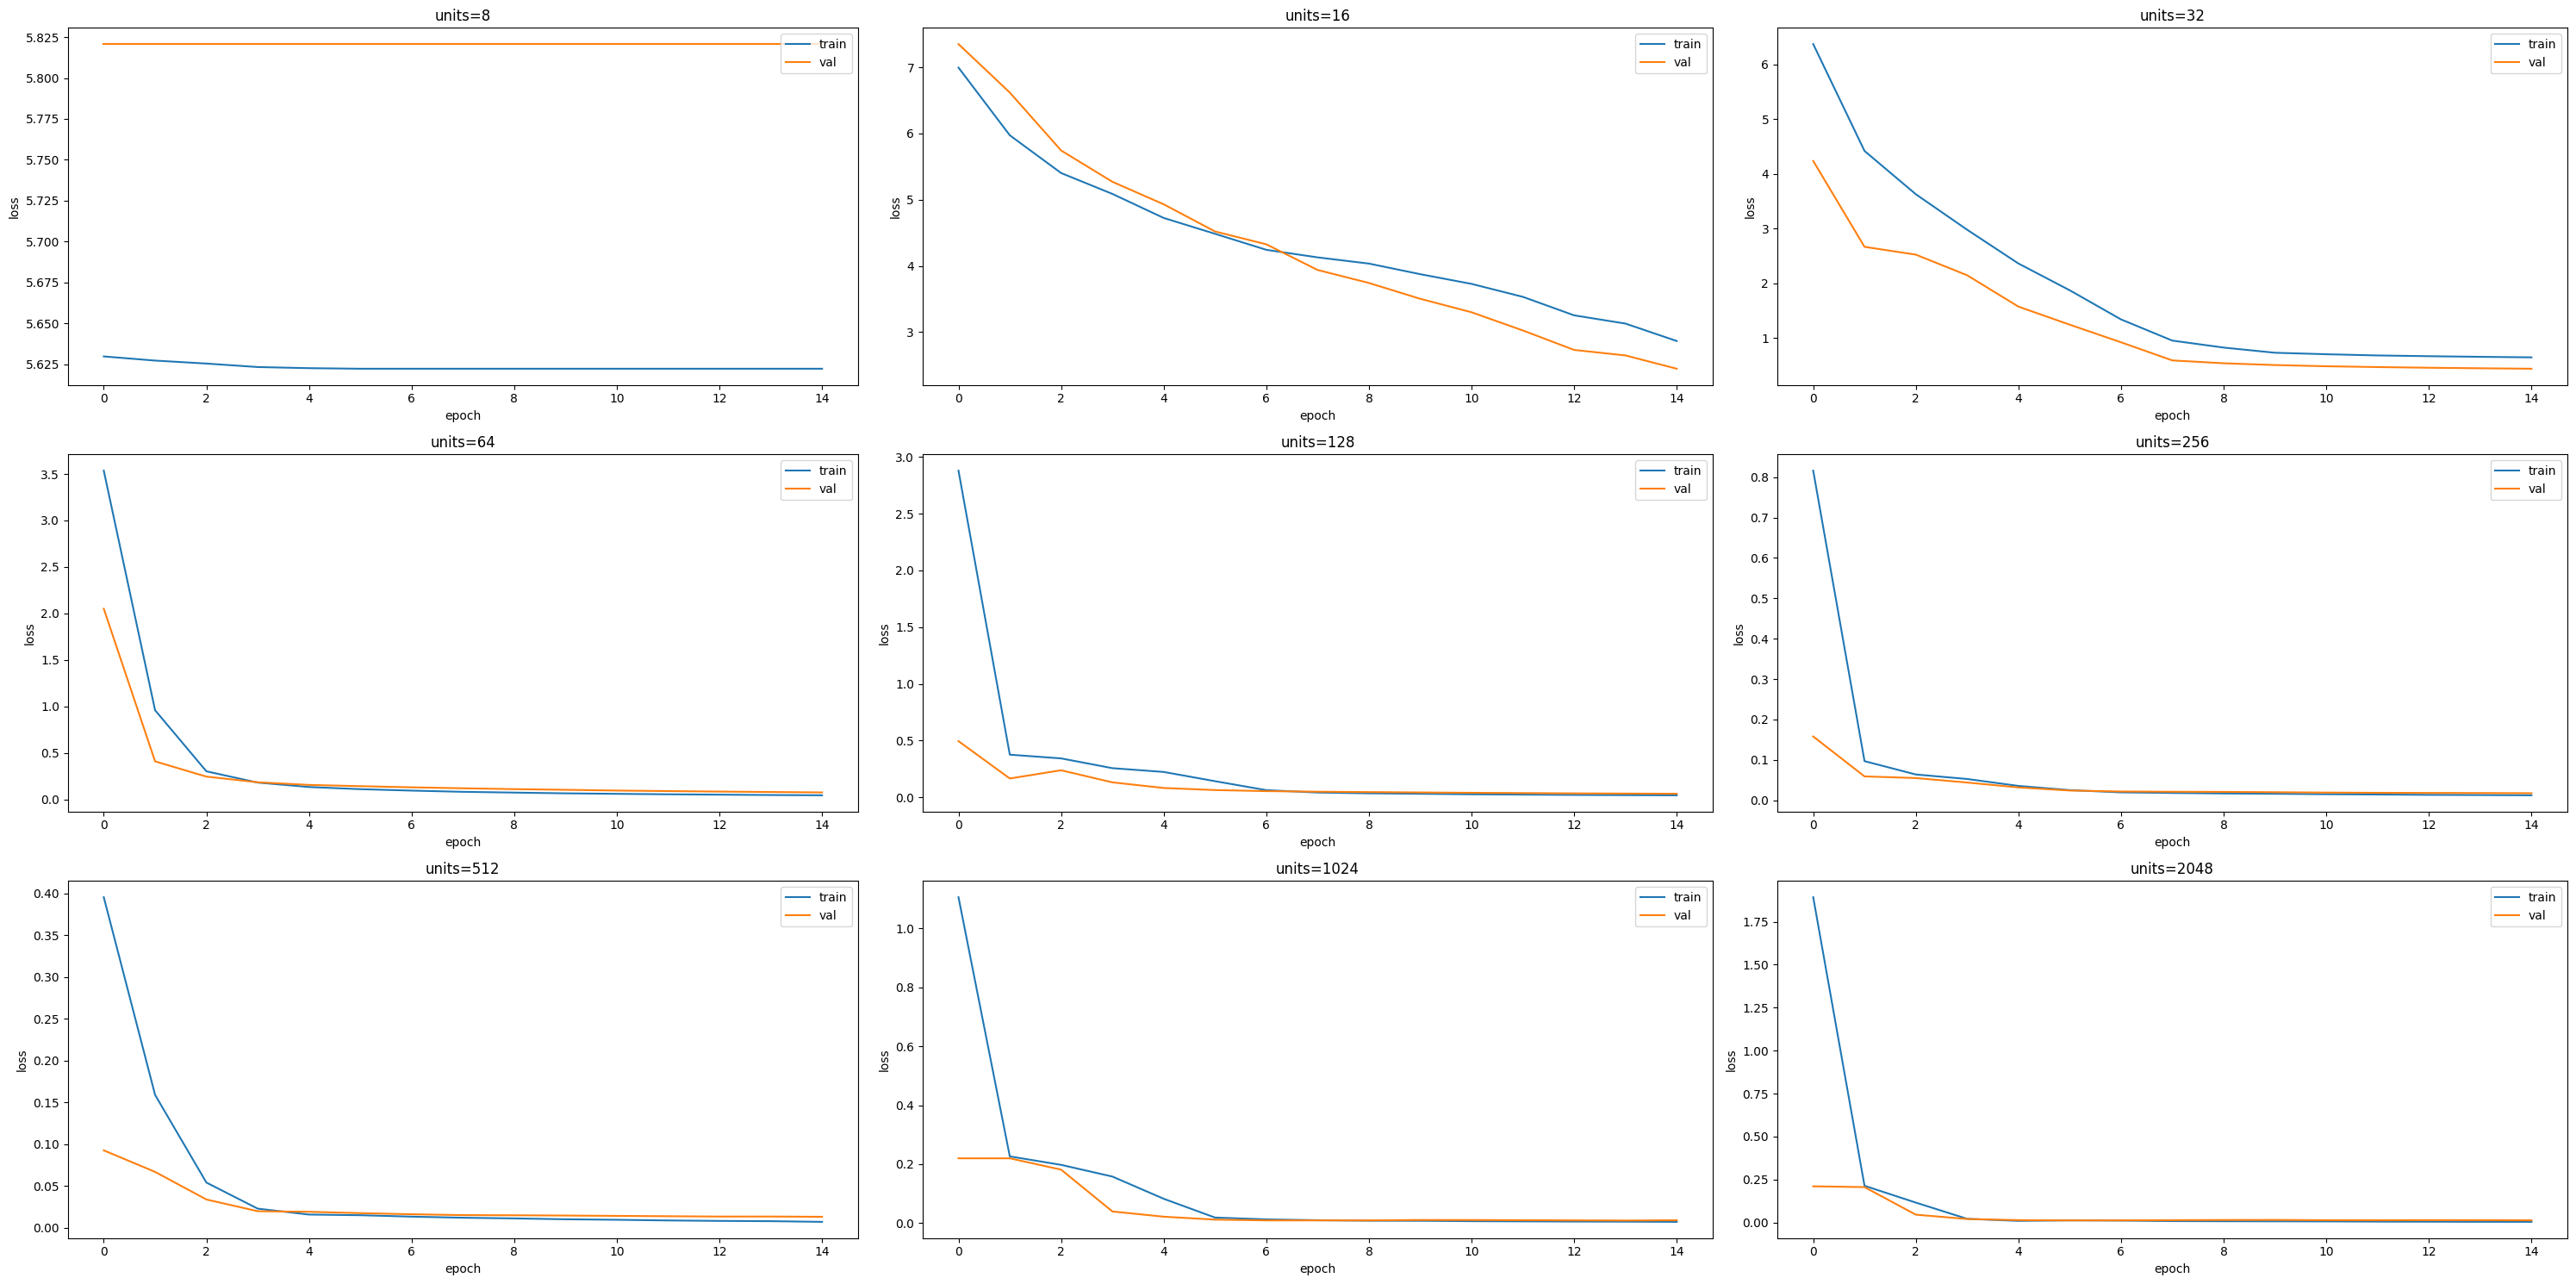

In [43]:
fig, axes = plt.subplots(3, 3, figsize=(30,15))
axes = axes.ravel()

histories = [
    (my_h_8, 'units=8'), (my_h_16, 'units=16'), (my_h_32, 'units=32'),
    (my_h_64, 'units=64'),(my_h_128, 'units=128'),(my_h_256, 'units=256'),
    (my_h_512, 'units=512'),(my_h_1024, 'units=1024'),(my_h_2048, 'units=2048')
            ]

for i, ax in enumerate(axes):
    ax.plot(histories[i][0].history['loss'])
    ax.plot(histories[i][0].history['val_loss'])
    ax.title.set_text(histories[i][1])
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'val'], loc='upper right')

plt.tight_layout()
plt.show()

**Activation function Relu**

The ReLU is the most used activation function in the world right now.  
Since, it is used in almost all the convolutional neural networks or deep learning.  
As you can see, the ReLU is half rectified (from bottom).   
f(z) is zero when z is less than zero and f(z) is equal to z when z is above or equal to zero.  
Range: [ 0 to infinity)  
The function and its derivative both are monotonic.  
But the issue is that all the negative values become zero immediately which decreases the ability of the model to fit or train from the data properly.  
That means any negative input given to the ReLU activation function turns the value into zero immediately in the graph,  
which in turns affects the resulting graph by not mapping the negative values appropriately.

In [44]:
relu, relu_h = create_model(unit=32,activation='relu')

Epoch 1/15
7/7 [==============================] - 1s 39ms/step - loss: 1.6361 - accuracy: 0.7136 - val_loss: 1.2086 - val_accuracy: 0.7290
Epoch 2/15
7/7 [==============================] - 0s 8ms/step - loss: 0.8901 - accuracy: 0.7981 - val_loss: 0.7317 - val_accuracy: 0.7944
Epoch 3/15
7/7 [==============================] - 0s 11ms/step - loss: 0.3364 - accuracy: 0.8592 - val_loss: 0.5217 - val_accuracy: 0.8318
Epoch 4/15
7/7 [==============================] - 0s 10ms/step - loss: 0.1749 - accuracy: 0.9014 - val_loss: 0.3815 - val_accuracy: 0.8785
Epoch 5/15
7/7 [==============================] - 0s 8ms/step - loss: 0.1401 - accuracy: 0.9343 - val_loss: 0.3203 - val_accuracy: 0.8972
Epoch 6/15
7/7 [==============================] - 0s 9ms/step - loss: 0.1251 - accuracy: 0.9343 - val_loss: 0.2979 - val_accuracy: 0.9065
Epoch 7/15
7/7 [==============================] - 0s 8ms/step - loss: 0.1144 - accuracy: 0.9437 - val_loss: 0.2819 - val_accuracy: 0.9159
Epoch 8/15
7/7 [===============

**Activation function Tanh**

tanh is also like logistic sigmoid but better.  
The range of the tanh function is from (-1 to 1). tanh is also sigmoidal (s - shaped).  
The advantage is that the negative inputs will be mapped strongly negative and the zero inputs will be mapped near zero in the tanh graph.  
The function is differentiable.    
The function is monotonic while its derivative is not monotonic.    
The tanh function is mainly used classification between two classes.  



In [45]:
tanh, tanh_h = create_model(unit=32,activation='tanh')

Epoch 1/15
7/7 [==============================] - 1s 37ms/step - loss: 0.5434 - accuracy: 0.8404 - val_loss: 0.2190 - val_accuracy: 0.9065
Epoch 2/15
7/7 [==============================] - 0s 10ms/step - loss: 0.2716 - accuracy: 0.8967 - val_loss: 0.1897 - val_accuracy: 0.8972
Epoch 3/15
7/7 [==============================] - 0s 11ms/step - loss: 0.2135 - accuracy: 0.9014 - val_loss: 0.1819 - val_accuracy: 0.9159
Epoch 4/15
7/7 [==============================] - 0s 11ms/step - loss: 0.1904 - accuracy: 0.9108 - val_loss: 0.1770 - val_accuracy: 0.9159
Epoch 5/15
7/7 [==============================] - 0s 10ms/step - loss: 0.1744 - accuracy: 0.9202 - val_loss: 0.1699 - val_accuracy: 0.9159
Epoch 6/15
7/7 [==============================] - 0s 9ms/step - loss: 0.1595 - accuracy: 0.9343 - val_loss: 0.1624 - val_accuracy: 0.9159
Epoch 7/15
7/7 [==============================] - 0s 8ms/step - loss: 0.1471 - accuracy: 0.9343 - val_loss: 0.1544 - val_accuracy: 0.9252
Epoch 8/15
7/7 [=============

**Activation function Sigmoid**

The main reason why we use sigmoid function is because it exists between (0 to 1).  
Therefore, it is especially used for models where we have to predict the probability as an output.  
Since probability of anything exists only between the range of 0 and 1, sigmoid is the right choice.

In [46]:
sigmoid, sigmoid_h = create_model(unit=32,activation='sigmoid')

Epoch 1/15
7/7 [==============================] - 1s 37ms/step - loss: 0.6860 - accuracy: 0.6103 - val_loss: 0.6599 - val_accuracy: 0.6916
Epoch 2/15
7/7 [==============================] - 0s 12ms/step - loss: 0.6395 - accuracy: 0.7465 - val_loss: 0.6142 - val_accuracy: 0.7757
Epoch 3/15
7/7 [==============================] - 0s 9ms/step - loss: 0.5966 - accuracy: 0.8310 - val_loss: 0.5729 - val_accuracy: 0.8598
Epoch 4/15
7/7 [==============================] - 0s 11ms/step - loss: 0.5580 - accuracy: 0.9155 - val_loss: 0.5363 - val_accuracy: 0.8972
Epoch 5/15
7/7 [==============================] - 0s 11ms/step - loss: 0.5246 - accuracy: 0.9437 - val_loss: 0.5027 - val_accuracy: 0.9252
Epoch 6/15
7/7 [==============================] - 0s 10ms/step - loss: 0.4931 - accuracy: 0.9577 - val_loss: 0.4736 - val_accuracy: 0.9533
Epoch 7/15
7/7 [==============================] - 0s 12ms/step - loss: 0.4645 - accuracy: 0.9577 - val_loss: 0.4479 - val_accuracy: 0.9626
Epoch 8/15
7/7 [============

**No activation function**

In [47]:
no_activation, no_activation_h = create_model(unit=32,activation=None)

Epoch 1/15
7/7 [==============================] - 1s 38ms/step - loss: 1.7601 - accuracy: 0.8122 - val_loss: 2.7241 - val_accuracy: 0.7383
Epoch 2/15
7/7 [==============================] - 0s 8ms/step - loss: 1.5959 - accuracy: 0.8451 - val_loss: 2.7077 - val_accuracy: 0.7383
Epoch 3/15
7/7 [==============================] - 0s 8ms/step - loss: 1.3230 - accuracy: 0.8451 - val_loss: 2.5880 - val_accuracy: 0.7477
Epoch 4/15
7/7 [==============================] - 0s 10ms/step - loss: 1.2251 - accuracy: 0.8498 - val_loss: 2.1125 - val_accuracy: 0.7757
Epoch 5/15
7/7 [==============================] - 0s 9ms/step - loss: 1.1370 - accuracy: 0.8545 - val_loss: 1.9797 - val_accuracy: 0.7944
Epoch 6/15
7/7 [==============================] - 0s 10ms/step - loss: 1.1227 - accuracy: 0.8545 - val_loss: 1.9040 - val_accuracy: 0.8037
Epoch 7/15
7/7 [==============================] - 0s 8ms/step - loss: 1.0015 - accuracy: 0.8779 - val_loss: 1.6568 - val_accuracy: 0.8037
Epoch 8/15
7/7 [===============

**The accuracy of tanh and sigmoid functions is more than others.**

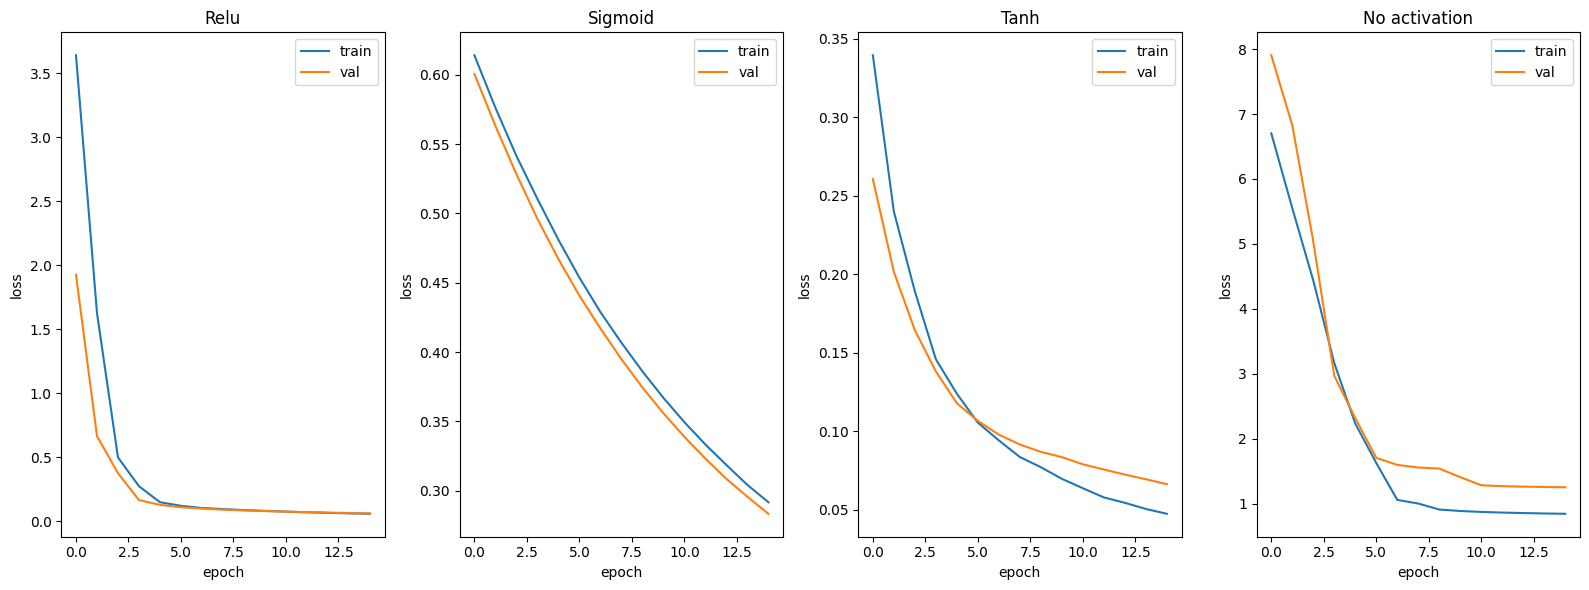

In [48]:
fig, axes = plt.subplots(1, 4, figsize=(16, 6))
axes = axes.ravel()

histories = [(relu_h, 'Relu'),
             (sigmoid_h, 'Sigmoid'),
             (tanh_h, 'Tanh'),
             (no_activation_h, 'No activation')]

for i, ax in enumerate(axes):
    ax.plot(histories[i][0].history['loss'])
    ax.plot(histories[i][0].history['val_loss'])
    ax.title.set_text(histories[i][1])
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'val'], loc='upper right')

plt.tight_layout()
plt.show()

**‌Diffrent Batch Size**

In [49]:
model_4, history_4 = create_model(activation='sigmoid', batch_size=4)

Epoch 1/15
54/54 [==============================] - 4s 23ms/step - loss: 0.5836 - accuracy: 0.6056 - val_loss: 0.4492 - val_accuracy: 0.8224
Epoch 2/15
54/54 [==============================] - 1s 10ms/step - loss: 0.4173 - accuracy: 0.9624 - val_loss: 0.3627 - val_accuracy: 0.9626
Epoch 3/15
54/54 [==============================] - 1s 10ms/step - loss: 0.3319 - accuracy: 0.9577 - val_loss: 0.3072 - val_accuracy: 0.9159
Epoch 4/15
54/54 [==============================] - 0s 7ms/step - loss: 0.2775 - accuracy: 0.9577 - val_loss: 0.2662 - val_accuracy: 0.9159
Epoch 5/15
54/54 [==============================] - 1s 10ms/step - loss: 0.2403 - accuracy: 0.9531 - val_loss: 0.2350 - val_accuracy: 0.9252
Epoch 6/15
54/54 [==============================] - 0s 7ms/step - loss: 0.2104 - accuracy: 0.9531 - val_loss: 0.2116 - val_accuracy: 0.9252
Epoch 7/15
54/54 [==============================] - 0s 4ms/step - loss: 0.1872 - accuracy: 0.9624 - val_loss: 0.1884 - val_accuracy: 0.9533
Epoch 8/15
54/54

In [50]:
model_32, history_32 = create_model(activation='sigmoid', batch_size=32)

Epoch 1/15
7/7 [==============================] - 1s 35ms/step - loss: 0.6795 - accuracy: 0.6009 - val_loss: 0.5730 - val_accuracy: 0.6916
Epoch 2/15
7/7 [==============================] - 0s 8ms/step - loss: 0.6262 - accuracy: 0.6009 - val_loss: 0.5388 - val_accuracy: 0.6916
Epoch 3/15
7/7 [==============================] - 0s 10ms/step - loss: 0.5812 - accuracy: 0.6009 - val_loss: 0.5095 - val_accuracy: 0.6822
Epoch 4/15
7/7 [==============================] - 0s 9ms/step - loss: 0.5417 - accuracy: 0.6009 - val_loss: 0.4845 - val_accuracy: 0.7009
Epoch 5/15
7/7 [==============================] - 0s 11ms/step - loss: 0.5092 - accuracy: 0.6385 - val_loss: 0.4625 - val_accuracy: 0.7290
Epoch 6/15
7/7 [==============================] - 0s 8ms/step - loss: 0.4830 - accuracy: 0.7606 - val_loss: 0.4431 - val_accuracy: 0.8505
Epoch 7/15
7/7 [==============================] - 0s 9ms/step - loss: 0.4558 - accuracy: 0.8404 - val_loss: 0.4250 - val_accuracy: 0.8692
Epoch 8/15
7/7 [===============

In [51]:
model_64, history_64 = create_model(activation='sigmoid', batch_size=64)

Epoch 1/15
4/4 [==============================] - 1s 63ms/step - loss: 0.9051 - accuracy: 0.4178 - val_loss: 1.0116 - val_accuracy: 0.3084
Epoch 2/15
4/4 [==============================] - 0s 18ms/step - loss: 0.8568 - accuracy: 0.4178 - val_loss: 0.9584 - val_accuracy: 0.3178
Epoch 3/15
4/4 [==============================] - 0s 13ms/step - loss: 0.8116 - accuracy: 0.4178 - val_loss: 0.9079 - val_accuracy: 0.3271
Epoch 4/15
4/4 [==============================] - 0s 18ms/step - loss: 0.7664 - accuracy: 0.4366 - val_loss: 0.8610 - val_accuracy: 0.3458
Epoch 5/15
4/4 [==============================] - 0s 14ms/step - loss: 0.7262 - accuracy: 0.4695 - val_loss: 0.8164 - val_accuracy: 0.4019
Epoch 6/15
4/4 [==============================] - 0s 14ms/step - loss: 0.6877 - accuracy: 0.5211 - val_loss: 0.7746 - val_accuracy: 0.4393
Epoch 7/15
4/4 [==============================] - 0s 16ms/step - loss: 0.6530 - accuracy: 0.5634 - val_loss: 0.7356 - val_accuracy: 0.4766
Epoch 8/15
4/4 [===========

**The model with batch_size 4 is more accurate.**

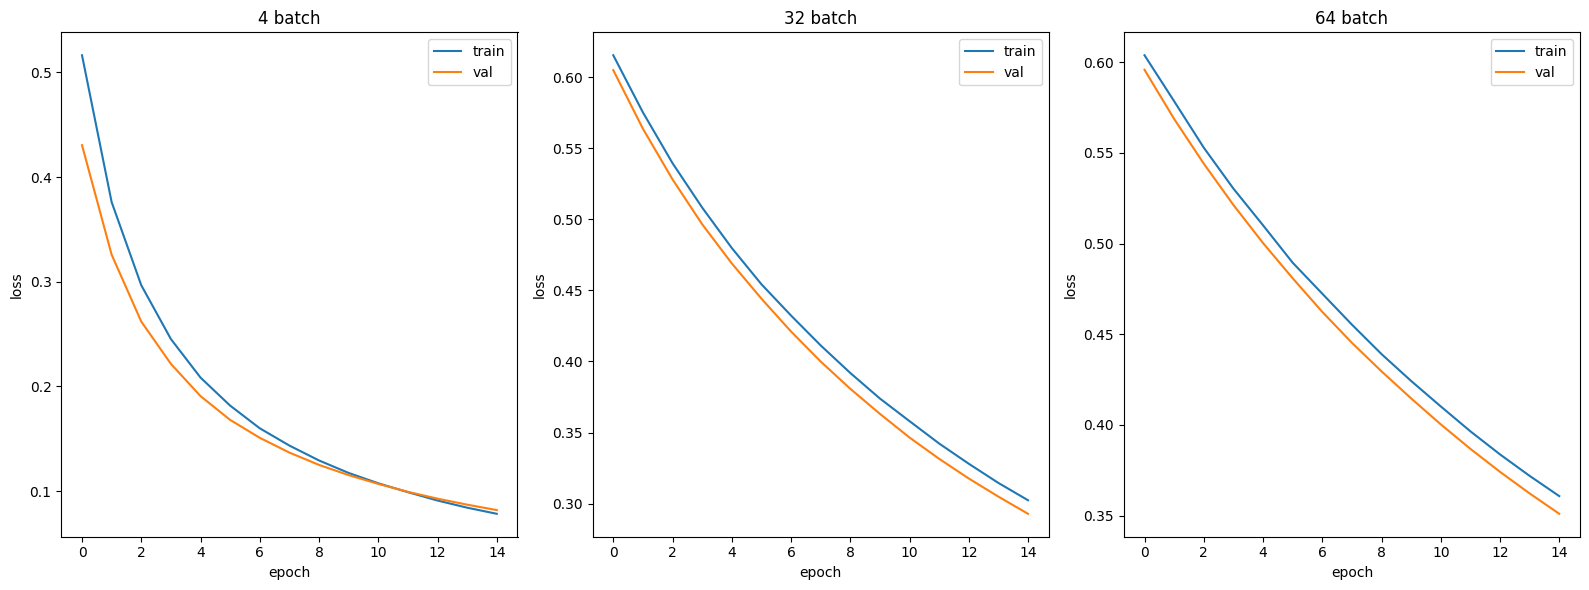

In [52]:
fig, axes = plt.subplots(1, 3, figsize=(16, 6))
axes = axes.ravel()

histories = [(history_4, '4 batch'),
            (history_32, '32 batch'),
            (history_64, '64 batch')]

for i, ax in enumerate(axes):
    ax.plot(histories[i][0].history['loss'])
    ax.plot(histories[i][0].history['val_loss'])
    ax.title.set_text(histories[i][1])
    ax.set_ylabel('loss')
    ax.set_xlabel('epoch')
    ax.legend(['train', 'val'], loc='upper right')

plt.tight_layout()
plt.show()

‌**Best Model**


In [53]:
def create_best_model(activation, batch_size=32,unit=32):
    acc_fold = []
    loss_fold = []
    fold_n=1
    kfold = KFold(n_splits=3, shuffle=True, random_state=1)

    for train, test in kfold.split(x_train, y_train):
        model = Sequential()
        model.add(keras.Input(shape=(25,)))
        model.add(Dense(units=unit, activation=activation))
        model.add(Dense(units=unit, activation=activation))
        model.add(Dense(1, activation=activation))

        model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

        h = model.fit(x_train.iloc[train],y_train.iloc[train],epochs=50,batch_size=batch_size,validation_data=(x_train.iloc[test], y_train.iloc[test]))
        scores = model.evaluate(x_train.iloc[test], y_train.iloc[test], verbose=0)
        acc_fold.append(scores[1] * 100)
        loss_fold.append(scores[0])
        fold_n = fold_n + 1

    print('Average scores for all folds:')
    print(f'> Accuracy: {np.mean(acc_fold)} (+- {np.std(acc_fold)})')
    print(f'> Loss: {np.mean(loss_fold)}')
    return model,h

In [54]:
best_model , best_h = create_best_model(batch_size=64,activation='relu',unit=1024)

Epoch 1/50
4/4 [==============================] - 1s 100ms/step - loss: 1.6423 - accuracy: 0.8451 - val_loss: 0.0350 - val_accuracy: 0.9907
Epoch 2/50
4/4 [==============================] - 0s 38ms/step - loss: 0.0373 - accuracy: 0.9859 - val_loss: 0.0408 - val_accuracy: 0.9813
Epoch 3/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0272 - accuracy: 0.9859 - val_loss: 0.0156 - val_accuracy: 0.9907
Epoch 4/50
4/4 [==============================] - 0s 40ms/step - loss: 0.0085 - accuracy: 0.9953 - val_loss: 0.0086 - val_accuracy: 0.9907
Epoch 5/50
4/4 [==============================] - 0s 36ms/step - loss: 0.0053 - accuracy: 1.0000 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 6/50
4/4 [==============================] - 0s 40ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0085 - val_accuracy: 1.0000
Epoch 7/50
4/4 [==============================] - 0s 41ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 1.0000
Epoch 8/50
4/4 [==========

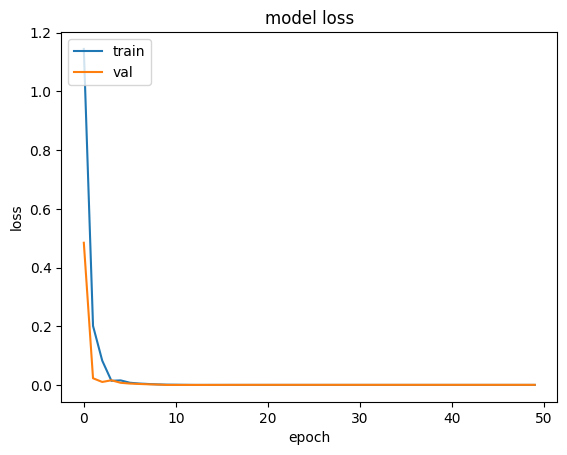

In [55]:
plot_model(best_model,best_h,x_test,y_test)